# Import Necessary Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score, r2_score
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import warnings
from gensim.models import KeyedVectors

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/MINA/Downloads/movies.csv')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

# Check Null Values

In [5]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

# Check Duplicated

In [6]:
df.duplicated().sum()

0

# Handling Missing Data

In [7]:
df["genres"].fillna("[]",inplace=True)
df["overview"].fillna(value="[]",inplace=True)
df["release_date"].fillna(df["release_date"].mode()[0],inplace=True)
df["runtime"].fillna(df["runtime"].median(),inplace=True)
df["cast"].fillna(value="Unknown",inplace=True)
df["director"].fillna(value="Unknown",inplace=True)
df['tagline'] = df['tagline'].fillna('[]')
df["keywords"]=df["keywords"].fillna(' ')


In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year 

# Check Outliers

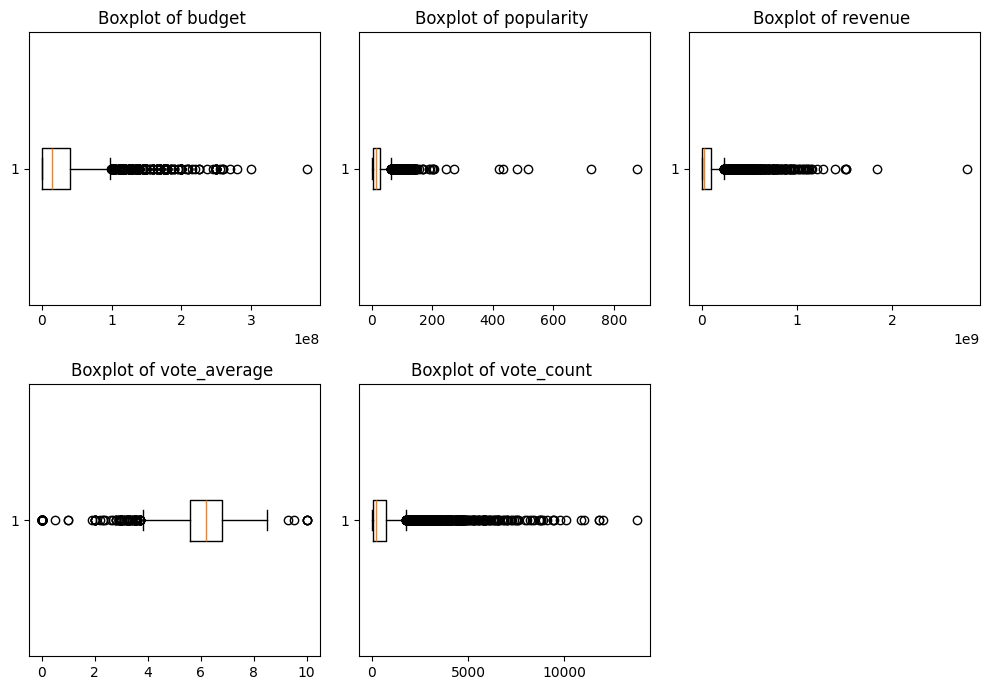

In [9]:
numeric_columns=["budget","popularity","revenue","vote_average","vote_count"]
plt.figure(figsize=(10,7))
for i ,feature in enumerate(numeric_columns,start=1):
    plt.subplot(2,3,i)
    plt.boxplot(df[feature],vert=False)
    plt.title(f"Boxplot of {feature} ")
plt.tight_layout()    
plt.show()

# Remove Ouliers using IQR method

Outliers have been removed from the dataset


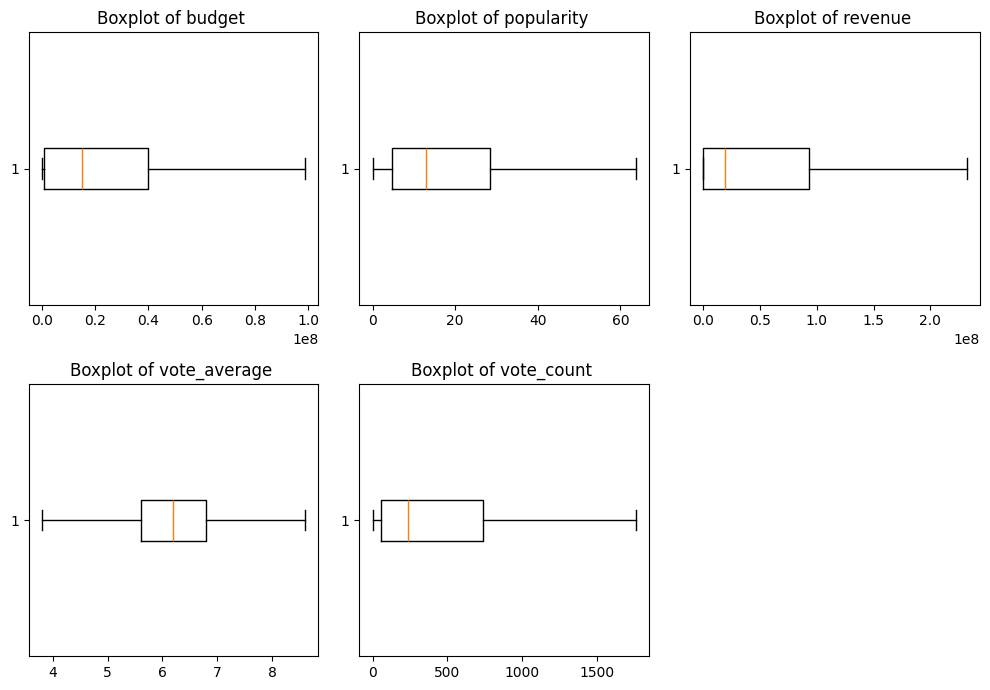

In [10]:

for i, col in enumerate(numeric_columns):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lf = Q1 - 1.5 * IQR
    Up = Q3 + 1.5 *IQR
    Lower_Outliers = df[df[col] < Lf][col].values
    Upper_Outliers = df[df[col] > Up][col].values
    df[col].replace(Lower_Outliers, Lf, inplace=True)
    df[col].replace(Upper_Outliers, Up, inplace=True)

print("Outliers have been removed from the dataset")
numeric_columns=["budget","popularity","revenue","vote_average","vote_count"]
plt.figure(figsize=(10,7))
for i ,feature in enumerate(numeric_columns,start=1):
    plt.subplot(2,3,i)
    plt.boxplot(df[feature],vert=False)
    plt.title(f"Boxplot of {feature} ")
plt.tight_layout()    
plt.show()

# Data Analysis

In [11]:
df["budget"].describe()

count    4.803000e+03
mean     2.576586e+07
std      3.010471e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      9.881500e+07
Name: budget, dtype: float64

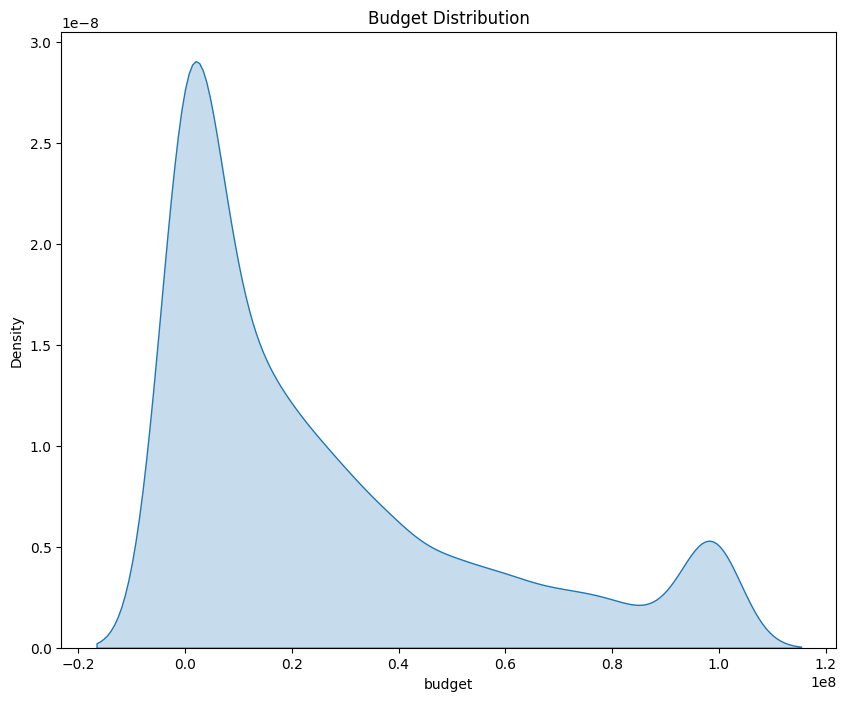

In [12]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["budget"],fill=True,palette="Set2")
plt.title("Budget Distribution")
plt.show()

In [13]:
Top_10_Movie_Budget=df[["title","genres","budget"]].sort_values(by="budget",ascending=False).head(20)
Top_10_Movie_Budget

,title,genres,budget
0,Avatar,Action Adventure Fantasy Science Fiction,98815000
243,Night at the Museum,Action Adventure Comedy Family Fantasy,98815000
220,Prometheus,Science Fiction Adventure Mystery,98815000
219,Charlie's Angels: Full Throttle,Action Adventure Comedy,98815000
218,Jason Bourne,Action Thriller,98815000
217,Ghost Rider,Thriller Action Fantasy Horror,98815000
216,Life of Pi,Adventure Drama Action,98815000
215,Fantastic 4: Rise of the Silver Surfer,Adventure Fantasy Action Thriller,98815000
214,The Perfect Storm,Drama,98815000
213,Mission: Impossible II,Adventure Action Thriller,98815000


In [14]:
p=px.scatter(data_frame=Top_10_Movie_Budget,x="budget",y="genres",color="budget",size="budget",title="Top 10 Movies Budget")
p.show()

In [15]:
Most_Genres_Movies=df["genres"].value_counts().sort_values(ascending=False).head(20)
Most_Genres_Movies

Drama                    370
Comedy                   282
Drama Romance            164
Comedy Romance           144
Comedy Drama             142
Comedy Drama Romance     109
Horror Thriller           88
Documentary               68
Horror                    64
Drama Thriller            62
Drama Comedy              46
Crime Drama Thriller      43
Action Thriller           40
Drama History             37
Comedy Family             36
Action Comedy             36
Drama Comedy Romance      35
Crime Drama               33
Action Crime Thriller     30
Comedy Crime              30
Name: genres, dtype: int64

In [16]:
p=px.bar(Most_Genres_Movies,color=Most_Genres_Movies,title='Most Genres of Movies')
p.show()

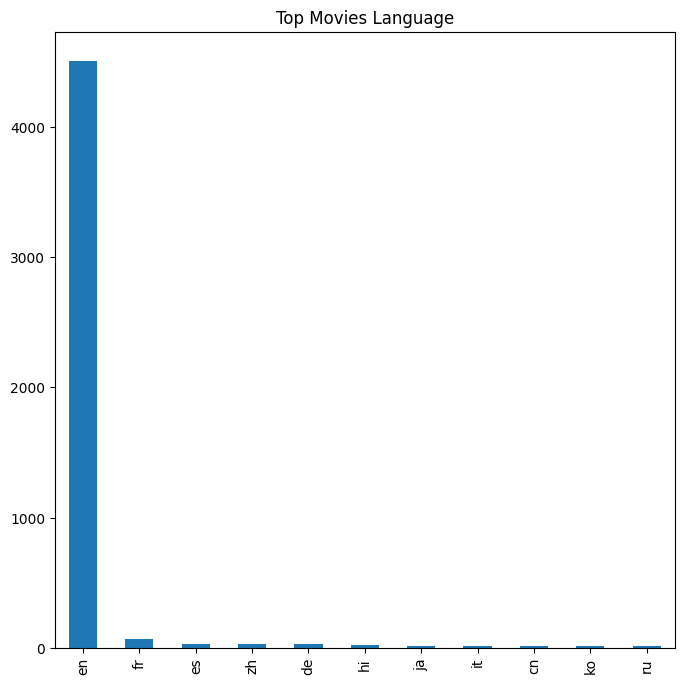

In [17]:
Most_language_movies = df["original_language"].value_counts().sort_values(ascending=False).head(11)

Most_language_movies.plot(kind="bar", figsize=(8, 8), title="Top Movies Language")
plt.show()



In [18]:
Popularity=df[["title","genres","popularity"]].sort_values(by="popularity",ascending=False).head(10)
Popularity

,title,genres,popularity
0,Avatar,Action Adventure Fantasy Science Fiction,63.781656
2760,Room,Drama Thriller,63.781656
439,Shutter Island,Drama Thriller Mystery,63.781656
2730,Black Swan,Drama Thriller,63.781656
2731,The Godfather: Part II,Drama Crime,63.781656
426,The Hunger Games,Science Fiction Adventure Fantasy,63.781656
425,Mission: Impossible,Adventure Action Thriller,63.781656
424,The Expendables,Thriller Adventure Action,63.781656
423,Bruce Almighty,Fantasy Comedy,63.781656
2743,The Butterfly Effect,Science Fiction Thriller,63.781656


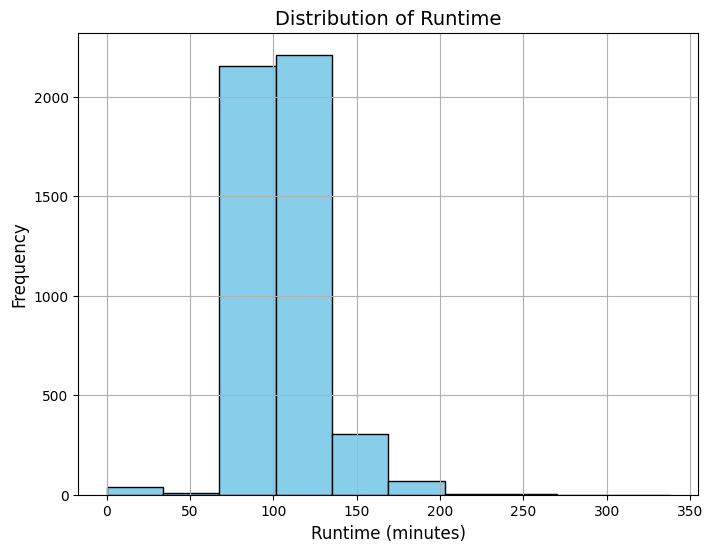

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['runtime'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Runtime', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [20]:
import ast
company_names = []
for item in df["production_companies"]:
    companies = ast.literal_eval(item)
    names = [company['name'] for company in companies]
    company_names.append(names)
    

df["production_companies"] = company_names


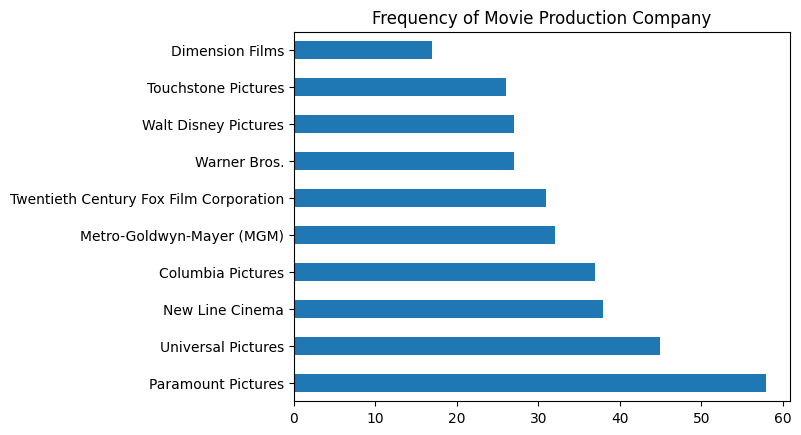

In [21]:
# Remove brackets from company names if they are stored as lists
df["production_companies"] = df["production_companies"].apply(lambda x: ''.join(x) if isinstance(x, list) else x)

# Plot the cleaned data
c = df["production_companies"].value_counts().sort_values(ascending=False)[1:11].plot(
    kind="barh", title="Frequency of Movie Production Company"
)

In [22]:
import json
def extract_country_names(json_string):
    try:
        countries = json.loads(json_string)
        return ', '.join([country['name'] for country in countries])
    except json.JSONDecodeError:
        return None

df['production_countries'] = df['production_countries'].apply(extract_country_names)
df['spoken_languages'] = df['spoken_languages'].apply(extract_country_names)


In [23]:
df["Profit"]=df["revenue"]-df["budget"]
Top_10_Move_Profits=df[["title","genres","production_companies","production_countries","release_date","Profit"]].sort_values(by="Profit",ascending=False).head(10)
Top_10_Move_Profits

,title,genres,production_companies,production_countries,release_date,Profit
691,Wild Hogs,Action Adventure Comedy,Wild Hogs ProductionsTouchstone Pictures,United States of America,2007-03-02,232292967.5
2669,Crocodile Dundee II,Adventure Comedy,Paramount Pictures,"Australia, United States of America",1988-05-19,232292967.5
359,Alvin and the Chipmunks: The Road Chip,Adventure Animation Comedy Family,Regency EnterprisesFox 2000 PicturesSunswept E...,United States of America,2015-12-17,232292967.5
4496,The Blair Witch Project,Horror Mystery,Artisan EntertainmentHaxan Films,United States of America,1999-07-14,232232967.5
4441,Bambi,Animation Drama Family,Walt Disney Productions,United States of America,1942-08-14,231434967.5
3824,The Full Monty,Comedy,Channel Four FilmsTwentieth Century Fox Film C...,United Kingdom,1997-08-13,228792967.5
3813,Gone with the Wind,Drama Romance War,Selznick International PicturesMetro-Goldwyn-M...,United States of America,1939-12-15,228292967.5
3593,My Big Fat Greek Wedding,Comedy Drama Romance,Home Box Office (HBO)PlaytoneGold Circle Films...,"Canada, United States of America",2002-02-22,227292967.5
3202,Crocodile Dundee,Adventure Comedy,Paramount PicturesRimfire Films,Australia,1986-09-26,227292967.5
3696,Four Weddings and a Funeral,Comedy Drama Romance,Channel Four FilmsPolyGram Filmed Entertainmen...,United Kingdom,1994-03-09,226292967.5


In [24]:
top=px.histogram(data_frame=Top_10_Move_Profits,x="Profit",y="title",title="Top 10 Move Profits",color="Profit")
top.show()

In [25]:
x=df["status"].value_counts()
x

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

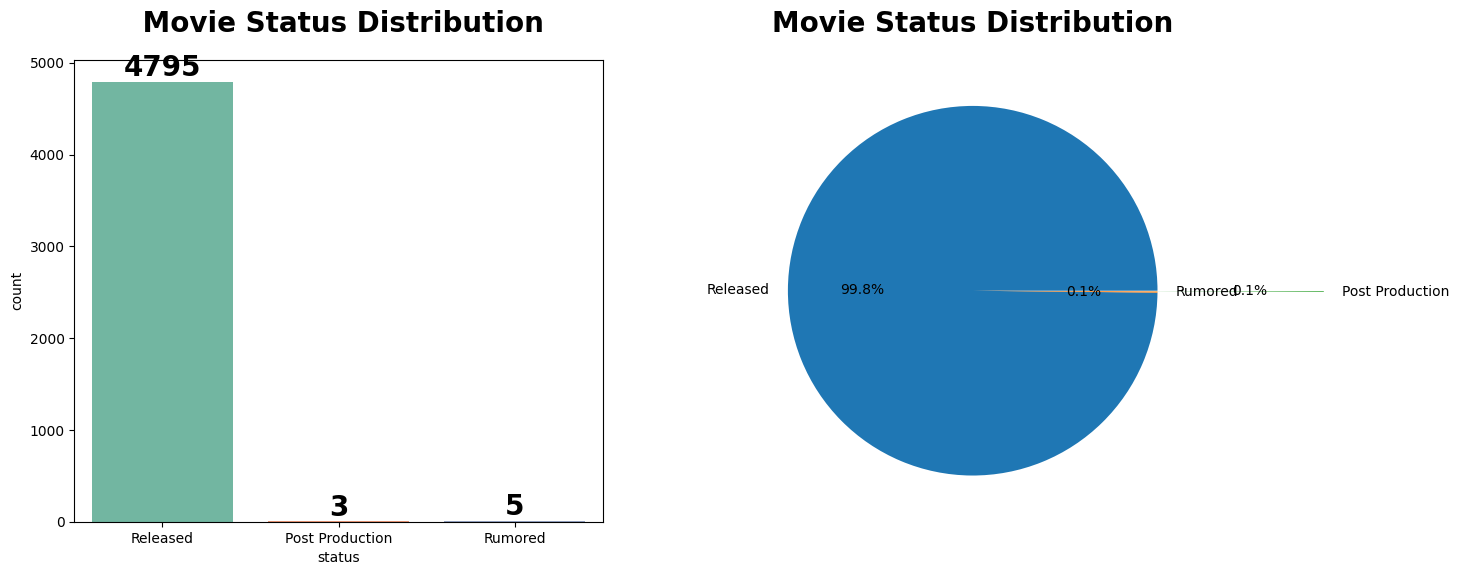

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x="status",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
ax.bar_label(ax.containers[2],fontweight="black",size=20)
plt.title(" Movie Status Distribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(x.values,labels=x.index,autopct="%1.1f%%",explode=[0.0,0.0,0.9],colors=sns.set_palette("Set2"))
plt.title("Movie Status Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [27]:
df["vote_average"].describe()

count    4803.000000
mean        6.154508
std         0.955853
min         3.800000
25%         5.600000
50%         6.200000
75%         6.800000
max         8.600000
Name: vote_average, dtype: float64

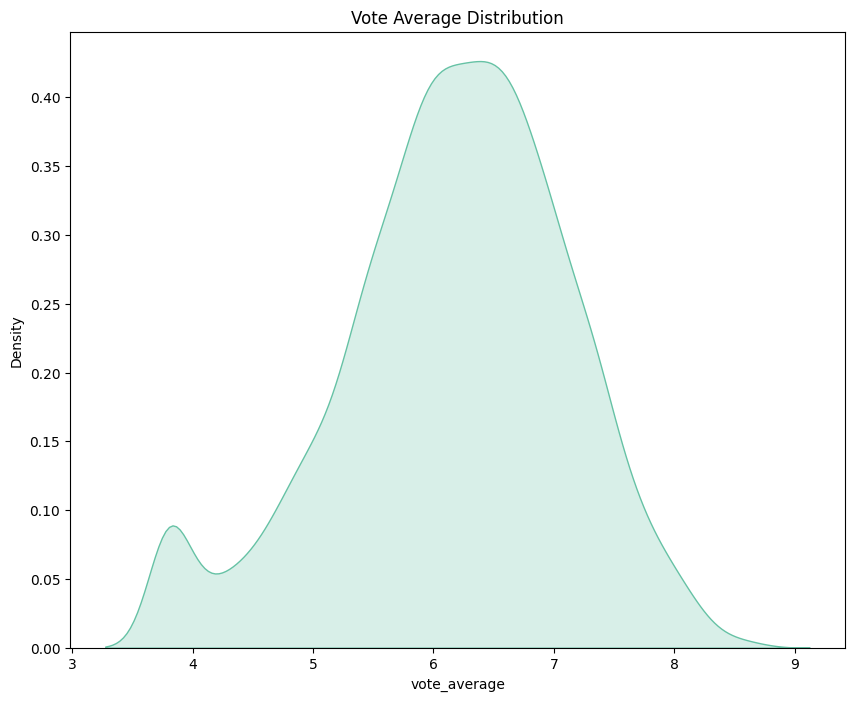

In [28]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["vote_average"],fill=True,palette="Set2")
plt.title("Vote Average Distribution")
plt.show()

In [29]:
Top_Rated_Movies = df[["title","vote_average","genres"]].sort_values(by="vote_average", ascending=False).head(10)
Top_Rated_Movies

,title,vote_average,genres
3519,Stiff Upper Lips,8.6,Comedy
2386,One Man's Hero,8.6,Western Action Drama History
3992,Sardaarji,8.6,[]
4045,"Dancer, Texas Pop. 81",8.6,Comedy Drama Family
4662,Little Big Top,8.6,Comedy
4247,Me You and Five Bucks,8.6,Romance Comedy Drama
2970,There Goes My Baby,8.5,Drama Comedy
1881,The Shawshank Redemption,8.5,Drama Crime
2796,The Prisoner of Zenda,8.4,Adventure Drama Romance
3337,The Godfather,8.4,Drama Crime


In [30]:
p=px.histogram(data_frame=Top_Rated_Movies,x="vote_average",y="title",title="Top  Movies Rating",color="vote_average",hover_data=["title","genres"])
p.show()

In [31]:
# x=df.groupby("vote_average").mean().sort_values(by="vote_average",ascending=False).head(10)
# x

In [32]:
TD=df["director"].value_counts()[1:11]
TD

Steven Spielberg     27
Woody Allen          21
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         16
Robert Rodriguez     16
Spike Lee            16
Renny Harlin         15
Steven Soderbergh    15
Oliver Stone         14
Name: director, dtype: int64

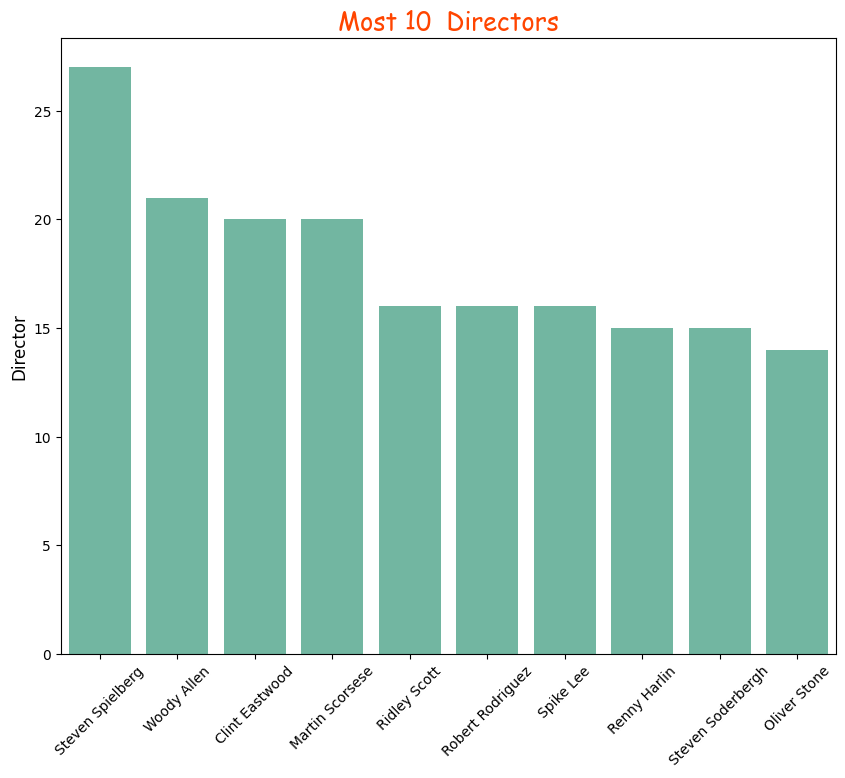

In [33]:
plt.figure(figsize=(10,8))
plt.title("Most 10  Directors",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="orangered")
sns.barplot(TD)
plt.ylabel("Director",fontsize=12)
plt.xticks(rotation=45)
plt.show()


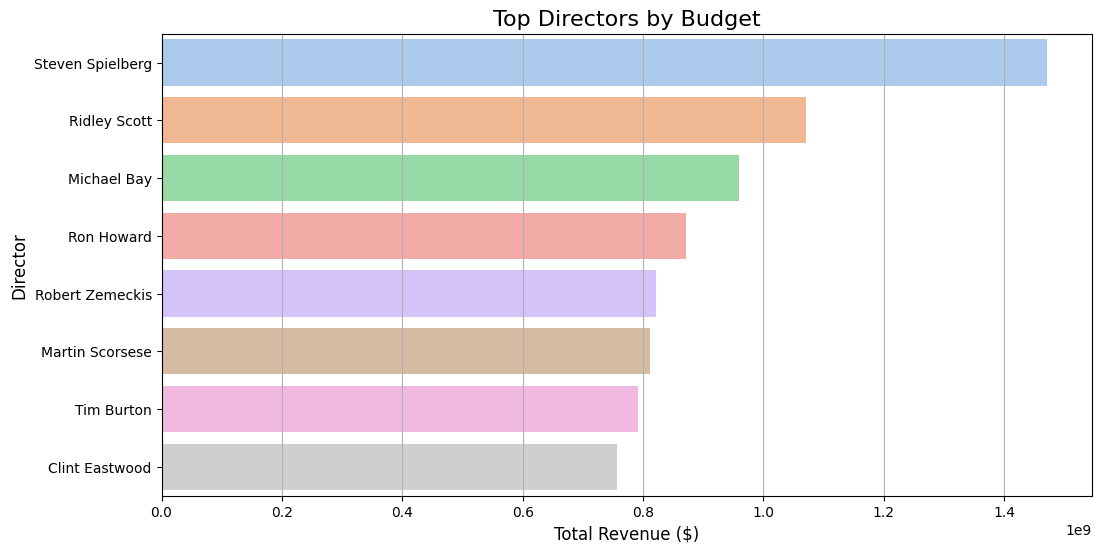

In [34]:
top_directors = df.groupby('director')['budget'].sum().reset_index()
top_directors = top_directors.sort_values(by='budget', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='budget', y='director', data=top_directors, palette='pastel')
plt.title('Top Directors by Budget', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.grid(axis='x')
plt.show()

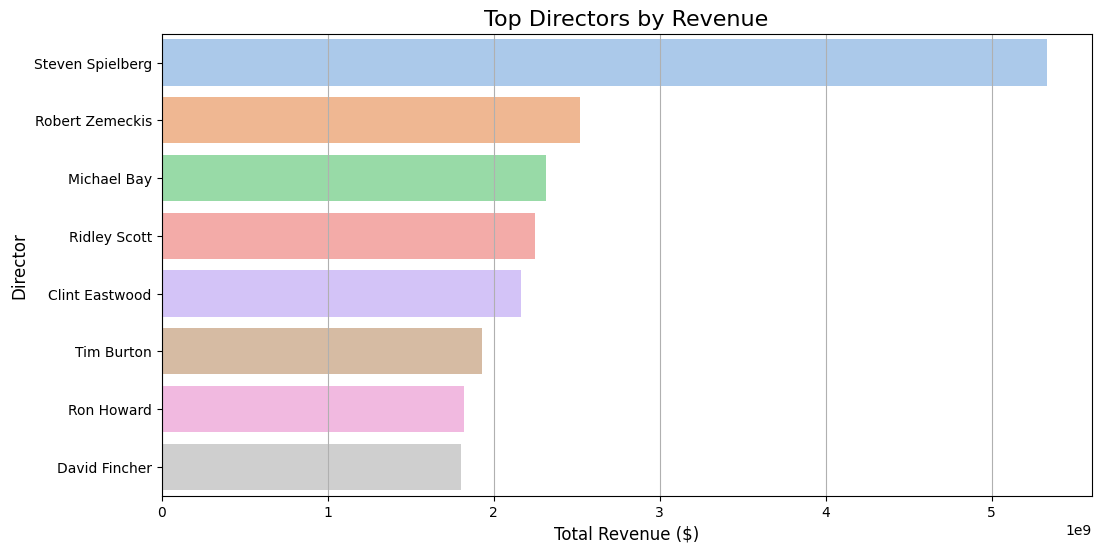

In [35]:
top_directors = df.groupby('director')['revenue'].sum().reset_index()
top_directors = top_directors.sort_values(by='revenue', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='director', data=top_directors, palette='pastel')
plt.title('Top Directors by Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.grid(axis='x')
plt.show()

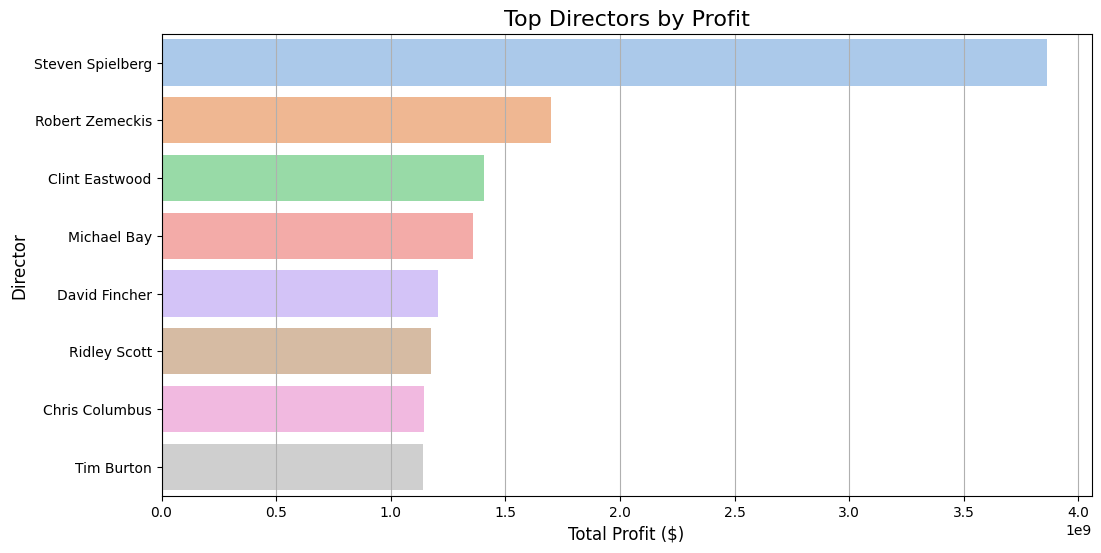

In [36]:
top_directors = df.groupby('director')['Profit'].sum().reset_index()
top_directors = top_directors.sort_values(by='Profit', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='director', data=top_directors, palette='pastel')
plt.title('Top Directors by Profit', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.grid(axis='x')
plt.show()

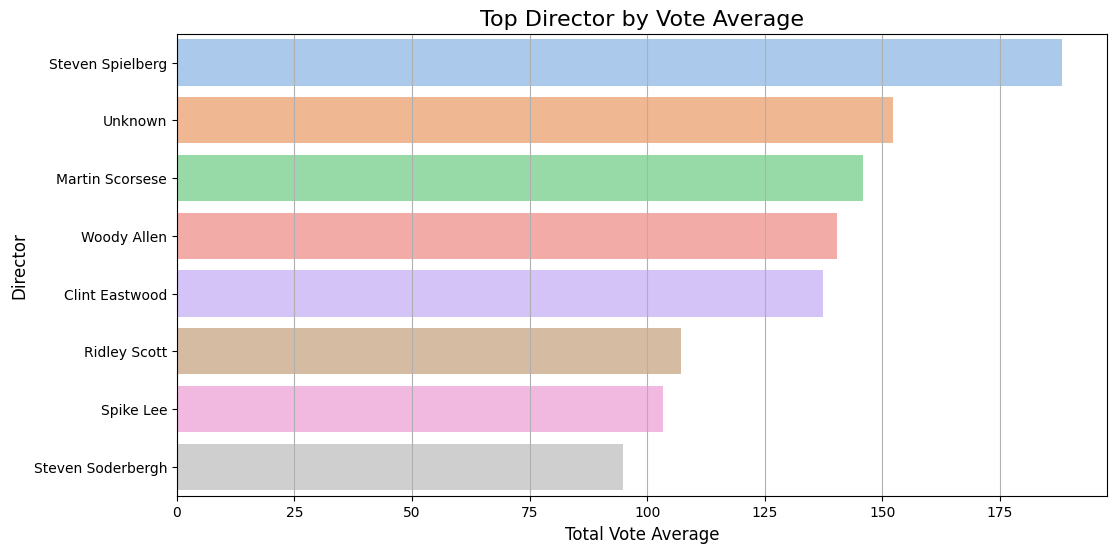

In [37]:
Top_Geners = df.groupby('director')['vote_average'].sum().reset_index()
Top_Geners = Top_Geners.sort_values(by='vote_average', ascending=False).head(8)
plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='director', data=Top_Geners, palette='pastel')
plt.title('Top Director by Vote Average', fontsize=16)
plt.xlabel('Total Vote Average', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.grid(axis='x')
plt.show()

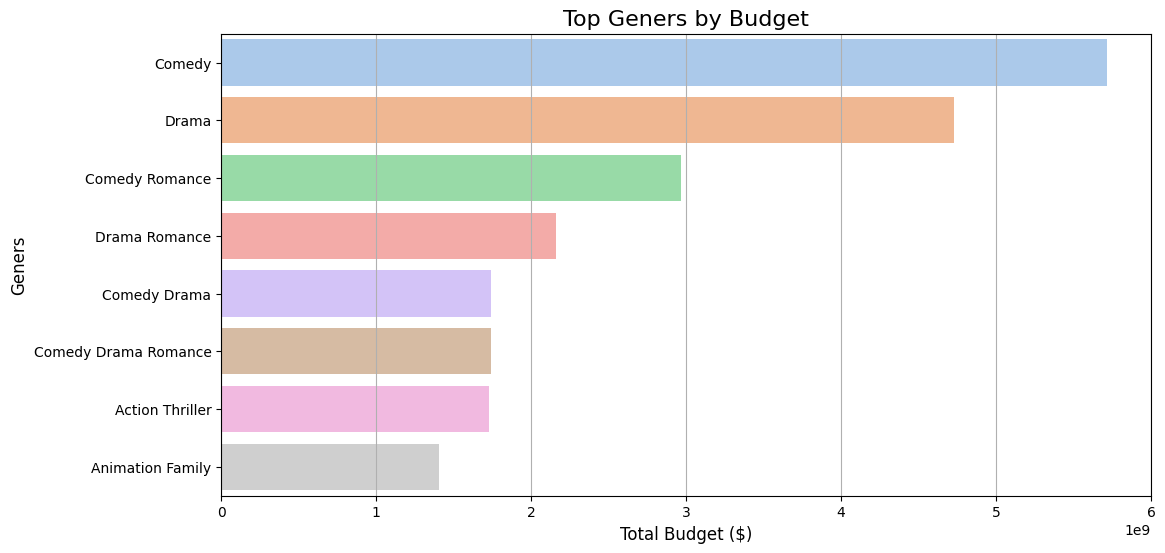

In [38]:
Top_Geners = df.groupby('genres')['budget'].sum().reset_index()
Top_Geners = Top_Geners.sort_values(by='budget', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='budget', y='genres', data=Top_Geners, palette='pastel')
plt.title('Top Geners by Budget', fontsize=16)
plt.xlabel('Total Budget ($)', fontsize=12)
plt.ylabel('Geners', fontsize=12)
plt.grid(axis='x')
plt.show()

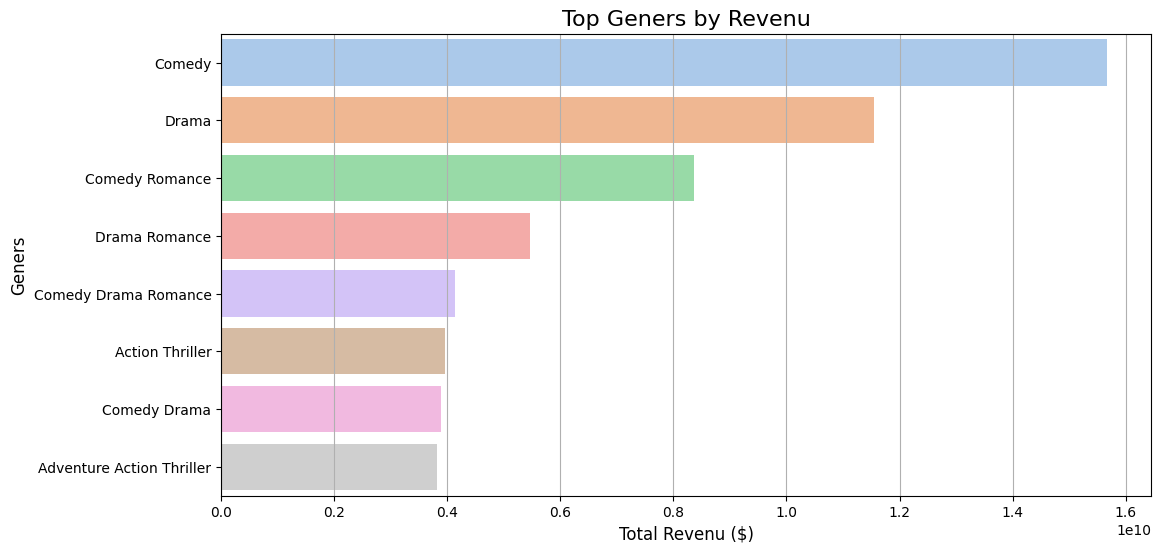

In [39]:
Top_Geners = df.groupby('genres')['revenue'].sum().reset_index()
Top_Geners = Top_Geners.sort_values(by='revenue', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='genres', data=Top_Geners, palette='pastel')
plt.title('Top Geners by Revenu', fontsize=16)
plt.xlabel('Total Revenu ($)', fontsize=12)
plt.ylabel('Geners', fontsize=12)
plt.grid(axis='x')
plt.show()

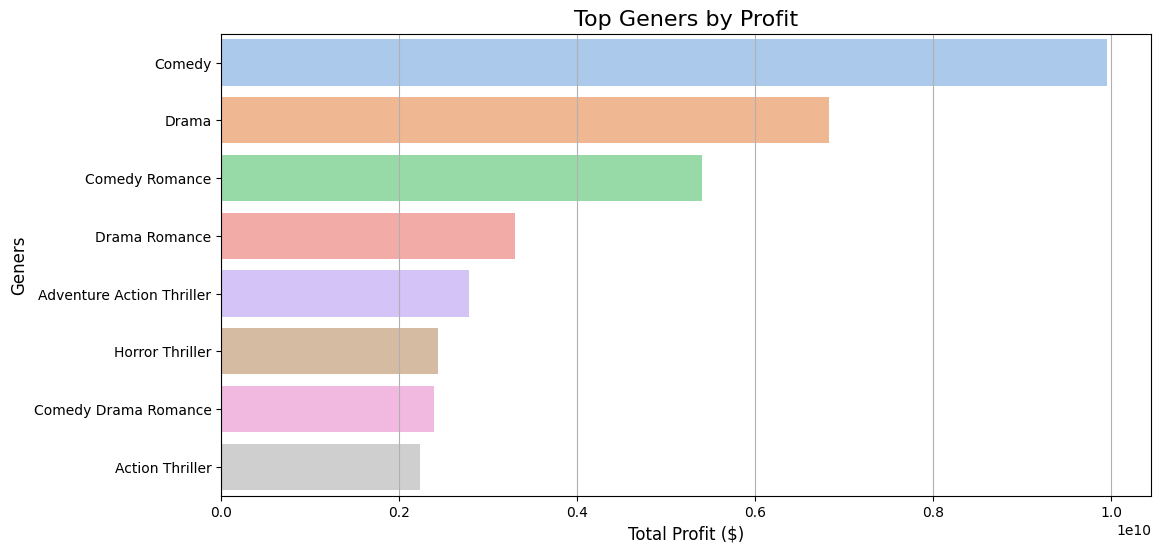

In [40]:
Top_Geners = df.groupby('genres')['Profit'].sum().reset_index()
Top_Geners = Top_Geners.sort_values(by='Profit', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='genres', data=Top_Geners, palette='pastel')
plt.title('Top Geners by Profit', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Geners', fontsize=12)
plt.grid(axis='x')
plt.show()

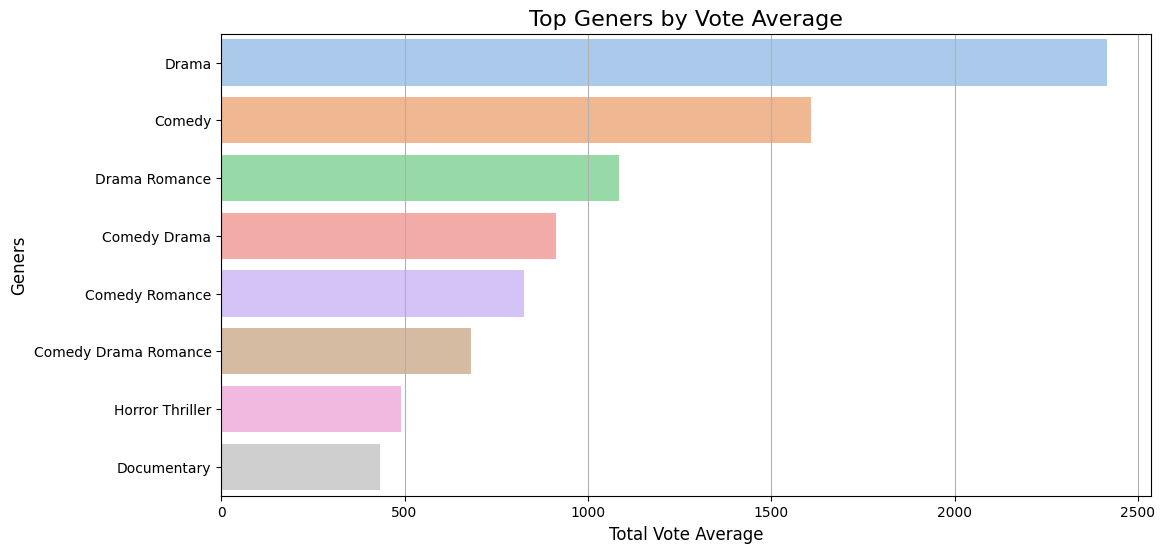

In [41]:
Top_Geners = df.groupby('genres')['vote_average'].sum().reset_index()
Top_Geners = Top_Geners.sort_values(by='vote_average', ascending=False).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='genres', data=Top_Geners, palette='pastel')
plt.title('Top Geners by Vote Average', fontsize=16)
plt.xlabel('Total Vote Average', fontsize=12)
plt.ylabel('Geners', fontsize=12)
plt.grid(axis='x')
plt.show()

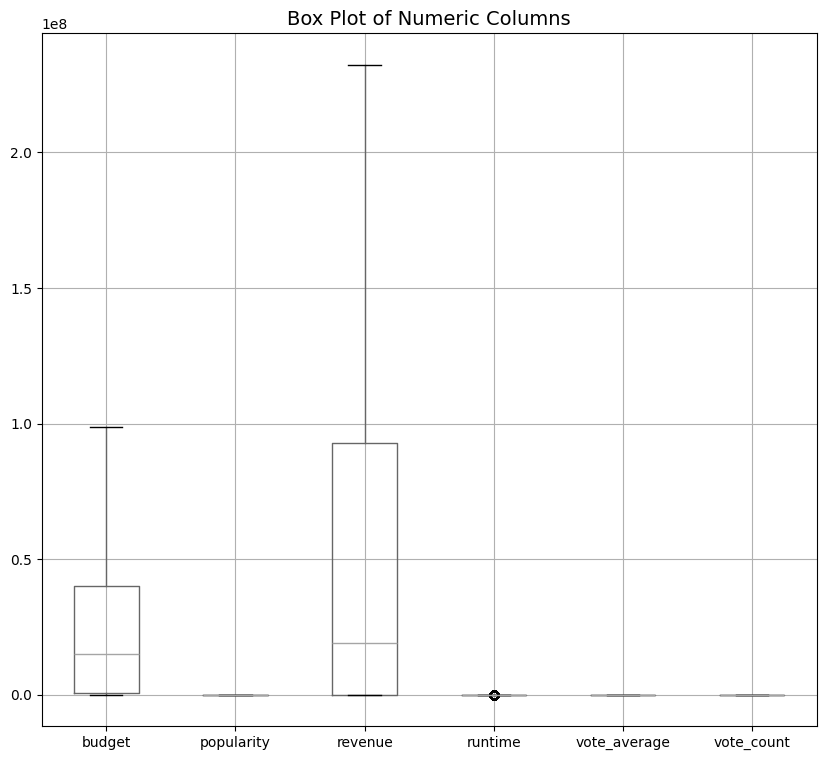

In [42]:
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

plt.figure(figsize=(10,9))
df[numeric_columns].boxplot()
plt.title('Box Plot of Numeric Columns', fontsize=14)
plt.xticks(rotation=0)
plt.show()

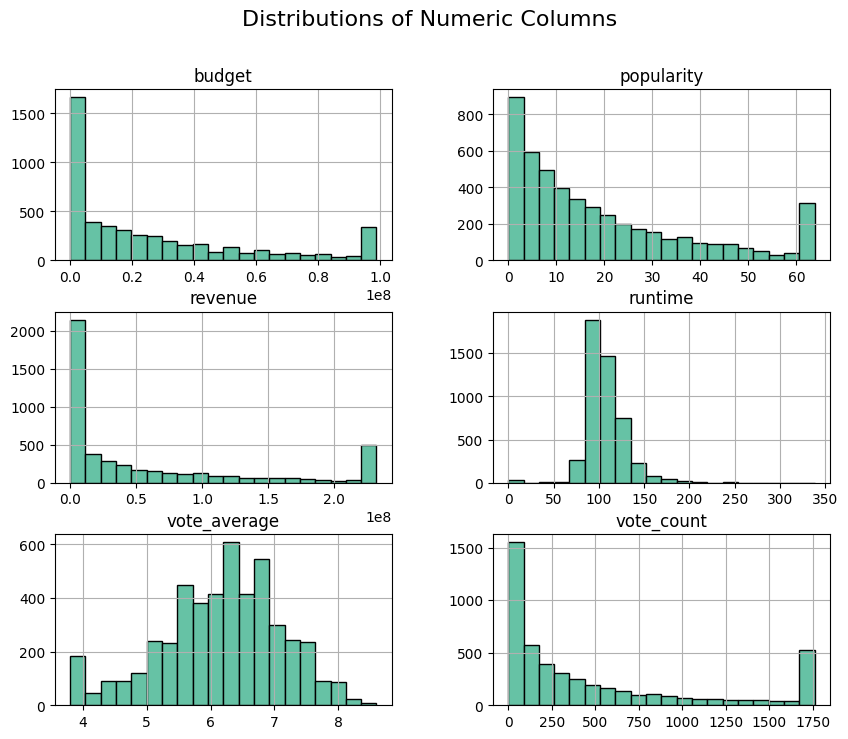

In [43]:

df[numeric_columns].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numeric Columns', fontsize=16)
plt.show()

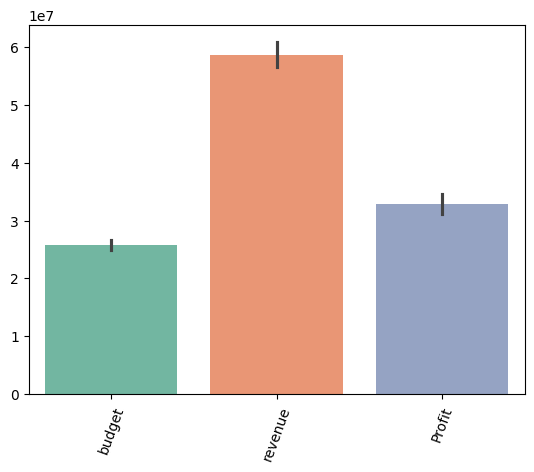

In [44]:
sns.barplot(df[["budget","revenue","Profit"]])
plt.xticks(rotation=70)
plt.show()

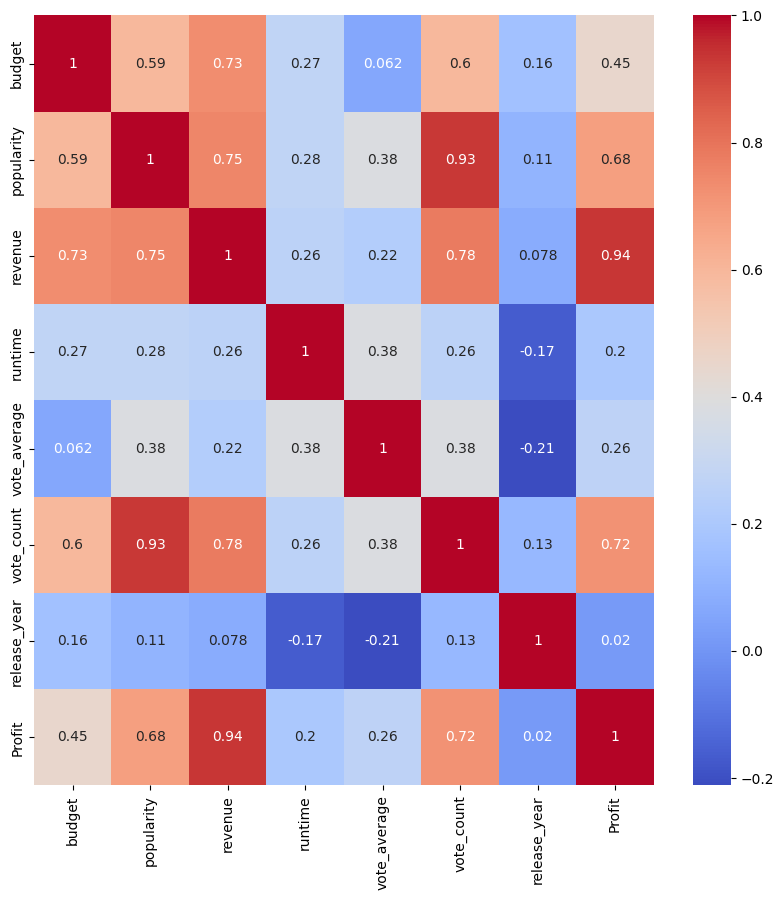

In [45]:
df.drop(columns=["index","id"],axis=1,inplace=True)
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# Recommendation System using Collaborative Filtering

In [46]:
#select relevant features for recommendation 
selected_feature =['genres'	,'keywords','tagline','cast','director']
selected_feature

['genres', 'keywords', 'tagline', 'cast', 'director']

In [47]:
#combine 5 features 
combined_feature=df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']
combined_feature

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance   A newlywed couple's honeymoon...
4800    Comedy Drama Romance TV Movie date love at fir...
4801    []   A New Yorker in Shanghai Daniel Henney El...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [48]:
vectorize=TfidfVectorizer()
feature_vector=vectorize.fit_transform(combined_feature)

In [49]:
print(feature_vector)

  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.24713765026964
  (4801, 17266)	0.28860981849329476
  (4801, 13835)	0.27870029291200094
  (4801, 13175)	0.28860981849329476
  (4801, 171

In [50]:
#get similarity score using cosine similarity
similarity=cosine_similarity(feature_vector)

In [51]:
similarity

array([[1.        , 0.07219487, 0.037733  , ..., 0.        , 0.        ,
        0.        ],
       [0.07219487, 1.        , 0.03281499, ..., 0.03575545, 0.        ,
        0.        ],
       [0.037733  , 0.03281499, 1.        , ..., 0.        , 0.05389661,
        0.        ],
       ...,
       [0.        , 0.03575545, 0.        , ..., 1.        , 0.        ,
        0.02651502],
       [0.        , 0.        , 0.05389661, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02651502, 0.        ,
        1.        ]])

In [52]:
movie_name=input('Enter your favourite name:')

In [53]:
list_of_all_titles=df['title'].tolist()
list_of_all_titles

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [54]:
#find the close match for the movie name given by the user 
find_close_match=difflib.get_close_matches(movie_name ,list_of_all_titles)
find_close_match

['Avatar']

In [55]:
close_match=find_close_match[0]
close_match

'Avatar'

In [56]:
index_of_movie = np.where(df['title'] == close_match)[0][0]
index_of_movie

0

In [57]:
#get list of similar movies
similarity_score=list(enumerate(similarity[index_of_movie]))
similarity_score

[(0, 1.0),
 (1, 0.07219486822992488),
 (2, 0.037732999577179294),
 (3, 0.012520204623868908),
 (4, 0.10702574467235304),
 (5, 0.07786899789424222),
 (6, 0.008237143013608844),
 (7, 0.03613473061484885),
 (8, 0.02960930964063025),
 (9, 0.026287167439951735),
 (10, 0.09261074046755373),
 (11, 0.012717759249124133),
 (12, 0.02721736008310012),
 (13, 0.029569752523347516),
 (14, 0.06915925473724743),
 (15, 0.019551594499309027),
 (16, 0.034263405780616416),
 (17, 0.02603656461429414),
 (18, 0.05714759266672412),
 (19, 0.0389505953521203),
 (20, 0.03971480215415496),
 (21, 0.01201480380565613),
 (22, 0.030438694261989592),
 (23, 0.045926535588179496),
 (24, 0.04623989017965258),
 (25, 0.04284926095950226),
 (26, 0.07010711150614288),
 (27, 0.037198076232328854),
 (28, 0.04083909796927843),
 (29, 0.03858648330156398),
 (30, 0.07893753610792024),
 (31, 0.06055522138055148),
 (32, 0.030362745635800832),
 (33, 0.03591021470068869),
 (34, 0.0),
 (35, 0.037696741034748446),
 (36, 0.04891087950911

In [58]:
#sort similarity based on their similarity score
sorted_similar_movies=sorted(similarity_score, key=lambda x:x[1], reverse=True)
sorted_similar_movies

[(0, 1.0),
 (3158, 0.2494676630753241),
 (2403, 0.24841462595906272),
 (94, 0.24505931974059822),
 (56, 0.20378069648285427),
 (47, 0.20115287461144912),
 (1053, 0.19702752258651424),
 (838, 0.18017023369312363),
 (3730, 0.1764624118531341),
 (4593, 0.17448845797415172),
 (239, 0.17441748680810656),
 (1531, 0.1682605817219649),
 (2696, 0.1650346025917652),
 (812, 0.16062301907491794),
 (643, 0.15644455512484967),
 (2198, 0.15217161971893786),
 (770, 0.1502572672775349),
 (1951, 0.14933372705282924),
 (2229, 0.14661801285492254),
 (1922, 0.14481974301913123),
 (206, 0.14226144606175548),
 (3208, 0.1401230206493547),
 (1759, 0.13899056016968867),
 (43, 0.1348209130228474),
 (1473, 0.13476547670086914),
 (278, 0.13291021545504),
 (158, 0.1325289213162767),
 (1650, 0.13024318650645417),
 (1275, 0.1260221630479115),
 (3439, 0.12480340331169379),
 (661, 0.12153002734138184),
 (3202, 0.12144749322246055),
 (4332, 0.12002556168548509),
 (3105, 0.11948466494212537),
 (775, 0.11847062758014923),

In [59]:
#print name of 10 similar movies based on the index
print('Movies suggested to you : \n')
i=1
for movie in sorted_similar_movies:
    index=movie[0]
    title_from_index=df[df.index == index]['title'].values[0]
    if (i<11):
        print(i,'-',title_from_index)
        i+=1

Movies suggested to you : 

1 - Avatar
2 - Alien
3 - Aliens
4 - Guardians of the Galaxy
5 - Star Trek Beyond
6 - Star Trek Into Darkness
7 - Galaxy Quest
8 - Alien³
9 - Cargo
10 - Trekkies


# Recommendation Movies system Accuracy

In [60]:
def evaluate_recommendations(test_set, recommender_function):
    total_true_positives = 0
    total_false_positives = 0
    total_false_negatives = 0
    
    for user, input_item, expected_recommendations in test_set:
        recommended_items = recommender_function(input_item)
        
        true_positives = len(set(recommended_items).intersection(expected_recommendations))
        
        false_positives = len(recommended_items) - true_positives
        false_negatives = len(expected_recommendations) - true_positives
        
        total_true_positives += true_positives
        total_false_positives += false_positives
        total_false_negatives += false_negatives

    precision = (total_true_positives / (total_true_positives + total_false_positives)) if (total_true_positives + total_false_positives) > 0 else 0
    recall = (total_true_positives / (total_true_positives + total_false_negatives)) if (total_true_positives + total_false_negatives) > 0 else 0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

test_set = [
    ("user1", "Item_A", {"Item_B", "Item_C", "Item_D"}),
    ("user2", "Item_X", {"Item_Y", "Item_Z", "Item_W"}),
    # Add more user/item pairs and expected recommendations
]

def recommender_function(input_item):

    recommendations = {
        "Item_A": {"Item_B", "Item_C", "Item_F"},
        "Item_X": {"Item_Y", "Item_Z", "Item_W"},
    }
    return recommendations.get(input_item, set())

precision, recall, f1_score = evaluate_recommendations(test_set, recommender_function)
print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")


Precision: 0.8333333333333334, Recall: 0.8333333333333334, F1 Score: 0.8333333333333334


# Pretrained Model


In [61]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('C:/Users/MINA/Desktop/Instant Ai Diploma/Pre Trained Model/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
def get_average_vector(text, model):
    words = text.split()  
    words_in_model = [word for word in words if word in model]  
    if not words_in_model:
        return np.zeros(model.vector_size)  
    return np.mean([model[word] for word in words_in_model], axis=0)

df['overview_vector'] = df['overview'].apply(lambda x: get_average_vector(x, word_vectors))
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(df['overview_vector'].tolist())

def recommend(movie_title, df, similarity_matrix):
    movie_idx = df[df['title'] == movie_title].index[0]
    similar_movies = list(enumerate(similarity_matrix[movie_idx]))
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    recommended_movies = [df['title'].iloc[i[0]] for i in similar_movies[1:6]] 
    return recommended_movies

recommend('Avatar', df, similarity_matrix)


['Battleship',
 'E.T. the Extra-Terrestrial',
 'Space Battleship Yamato',
 'Beneath the Planet of the Apes',
 'Galaxina']